   # Ennovate Project - Pune House Price Prediction Model

Welcome to this project on housing price prediction model for properties in Pune, aimed at developing a model from scratch without using Transfer Learning or Pre-Trained models. This project handles a housing price prediction problem.Testing the model. We will start the project by importing necessary libraries.

## Step 1: Insllation and setup

In [1]:
import matplotlib.pyplot as plt       # used to plot graphs and data visualization
import seaborn as sns                       # Library for Data Visualization

import pandas as pd                   # for Data manipulation and analysis
import numpy as np                    # for performing Numerical operations on arrays

import sqlite3                        # Libraries for database interaction
from sqlalchemy import create_engine  # Libraries for database interaction

from sklearn.model_selection import train_test_split, cross_val_score

# above libraries are imported to split the data into training and test, calculating cross-validation score

from sklearn.linear_model import LinearRegression       # library for building Linear Regression Model

import pickle, json                   # libraries for object serialization and deserialization

## Step 2: Pipeline Creation
This pipeline will ingest dataset, performs validation and transformation on dataset, and will finally store the dataset.

1. upload the dataset.
2. Checking dataset for null values.
3. Checking datatype of each column in dataset.
4. converting the location names to lower case
5. storing the data in sql database.
6. running the pipeline

In [2]:
def ingest_data(file_path):
    df = pd.read_csv(file_path)  # Load raw data from a CSV file
    print("\n1. Dataset is uploaded succcesfully. \n")
    return df

def validate_and_transform(df):
    # Data validation: Check for missing values

    print("2. Null values in each column are:")
    print(df.isnull().sum())
    return df

def data_type(df):
    print("\n3. Data type for each column is listed below:")
    print(df.dtypes.to_string())
    return df

def lower_location(df):
    df['location'] = df['site_location'].str.lower()
    df = df.drop(columns=['site_location'])
    print("\n4. Column name is updated from site_location to location and location names are updated to lower case.")
    return df

# def store_data(df, ennovate_db='data_pipeline.db'):
#     df['size'] = df['size'].fillna('0 BHK')
#     df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
#     print("\n5. bhk column created based on size column.")
#     
#     # Establish SQL database connection
#     
#     engine = create_engine(f'sqlite:///{ennovate_db}')

#     # Store data in a table called 'processed_data'
#     df.to_sql('data', con=engine, if_exists='replace', index=False)
#     print("\n6. Dataset is stored to SQL database successfully. \n")
    
    
def run_pipeline(file_path):
    
    # Ingest raw data
    df = ingest_data(file_path)

    # Validate and transform data
    df = validate_and_transform(df)

    df = data_type(df)

    df = lower_location(df)
    
    #model = load_model(model_path)

    # Store data in SQL database
    # store_data(df)
    
    global df8
    print("\n5. Using preprocessed df8 DataFrame to store data.\n")
    
    return df

In [3]:
if __name__ == "__main__":
    file_path = r"C:\Users\lenovo\Desktop\Project\Ennovate_Test\pune_house_data.csv"
    df = run_pipeline(file_path)


1. Dataset is uploaded succcesfully. 

2. Null values in each column are:
area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

3. Data type for each column is listed below:
area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object

4. Column name is updated from site_location to location and location names are updated to lower case.

5. Using preprocessed df8 DataFrame to store data.



In [4]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,alandi road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,ambegaon budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,aundh road


## Step 3: Data Preprocessing and Cleaning

#### Step 3.1 

Checking the shape of dataset

In [5]:
df.head(5)

,area_type,availability,size,society,total_sqft,bath,balcony,price,location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,alandi road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,ambegaon budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,aundh road


In [6]:
df.shape

(13320, 9)

#### Step 3.2 

we will now check the values of "area_type" column

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

#### Step 3.3 

Based on our domain knowledge we can say that features like area_type, availability, society and balcony are not important in determining property price and we can safely excelude or delete these features from our dataset.

In [8]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.shape

(13320, 5)

#### Step 3.4 

Through our pipeline we know that some of the features have null values, we will handle them before moving ahead.

In [9]:
df1.isnull().sum()

size          16
total_sqft     0
bath          73
price          0
location       1
dtype: int64

#### Step 3.5 

Since, total null values are less than 1% of our dataset, it is safe t remove them before performing feature engineering.

In [10]:
df2 = df1.dropna()
df2.isnull().sum()

size          0
total_sqft    0
bath          0
price         0
location      0
dtype: int64

## Step 4: Feature Engineering

We will be adding and removing features from dataset to get a more robust dataset for training

### 4.1 Handling 'size' feature

We will first work with column 'size', it has number of bedrooms, however it does not have consistant format, we will correct this.

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### Step 4.1.1 

We can see that this column has some variance in how the number of bedrooms are represented across, however we can take only the integer part and create a new column to represent the rooms.

For this we will create a lambda function to use the space as separator and create a new feature to show number of bedrooms

In [12]:
df2 = df2.copy()

df2.loc[:,'bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df2.shape

(13246, 6)

### Step 4.2 Handling 'total_sqft' feature

In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Step 4.2.1 

We can see that not all values in 'total_sqft' column is in desired format and from inital pipeline we know that it is of data type 'object' and we need to convert this to numeric column.

Below function will performa a validation check on column total_sqft and will try to convert all values in column to float.

We will use the function to return the data where column total_sqft do not have float values.

In [15]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

df2[~df2['total_sqft'].apply(check_float)]

,size,total_sqft,bath,price,location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,prabhat road,2
188,2 BHK,1015 - 1540,2.0,56.800,wakadewadi,2
...,...,...,...,...,...,...
12975,2 BHK,850 - 1060,2.0,38.190,camp,2
12990,3 BHK,1804 - 2273,3.0,122.000,gokhale nagar,3
13059,2 BHK,1200 - 1470,2.0,72.760,anandnagar,2
13265,2 BHK,1133 - 1384,2.0,59.135,dapodi,2


#### Step 4.2.2

We have the option of tranforming of above data by taking the average of the low and high values of ranges, however, since this is only 1.5% of the total dataset, I will delete them and move ahead with feature engineering.

In [16]:
df2.loc[:, 'total_sqft'] = pd.to_numeric(df2['total_sqft'], errors='coerce')

df3 = df2.dropna(subset=['total_sqft'])

In [17]:
df3.shape

(13056, 6)

#### Step 4.2.3

with our domain knowledge we know that on normal sqft per bedroom ranges from 300-400 sqft we can consider anything below 250 sqft as an outlier and remove it

In [18]:
df3[(df3.total_sqft/df3.bhk) < 250]

,size,total_sqft,bath,price,location,bhk
9,6 Bedroom,1020.0,6.0,370.0,bhavani peth,6
45,8 Bedroom,600.0,9.0,200.0,kondhwa budruk,8
58,6 Bedroom,1407.0,4.0,150.0,mundhawa,6
68,8 Bedroom,1350.0,7.0,85.0,pirangut,8
70,3 Bedroom,500.0,3.0,100.0,pune railway station,3
...,...,...,...,...,...,...
13221,9 Bedroom,1178.0,9.0,75.0,pirangut,9
13277,7 Bedroom,1400.0,7.0,218.0,ghorpadi,7
13279,6 Bedroom,1200.0,5.0,130.0,gultekdi,6
13303,5 Bedroom,774.0,5.0,70.0,manik bagh,5


In [19]:
df4 = df3[~((df3.total_sqft/df3.bhk) < 250)]
df4.shape

(12444, 6)

### Step 4.3 Handling 'location' feature

#### Step 4.3.1

We will check how many locations we have and check the count for each location

In [20]:
df4['location'].unique()

array(['alandi road', 'ambegaon budruk', 'anandnagar', 'aundh',
       'aundh road', 'balaji nagar', 'baner', 'baner road',
       'bhandarkar road', 'bibvewadi', 'bopodi', 'budhwar peth',
       'bund garden road', 'camp', 'chandan nagar', 'dapodi',
       'deccan gymkhana', 'dehu road', 'dhankawadi', 'dhayari phata',
       'dhole patil road', 'erandwane', 'fatima nagar',
       'fergusson college road', 'ganesh peth', 'ganeshkhind',
       'ghorpade peth', 'other', 'gokhale nagar', 'guruwar peth',
       'hadapsar', 'hadapsar industrial estate', 'hingne khurd',
       'jangali maharaj road', 'kalyani nagar', 'karve nagar',
       'karve road', 'kasba peth', 'katraj', 'khadaki', 'khadki',
       'kharadi', 'kondhwa', 'kondhwa khurd', 'koregaon park', 'kothrud',
       'law college road', 'laxmi road', 'lulla nagar',
       'mahatma gandhi road', 'mangalwar peth', 'manik bagh',
       'market yard', 'mukund nagar', 'nagar road', 'nana peth',
       'narayan peth', 'narayangaon', 'navi

In [21]:
len(df2['location'].unique())

97

#### Step 4.3.2

Counting the number of samples for each location

In [22]:
location_count = df4.groupby('location')['location'].agg('count')

In [23]:
location_count.sort_values(ascending=False)

location
koregaon park       135
alandi road         134
bund garden road    134
sadashiv peth       134
paud road           134
                   ... 
gultekdi            125
kasba peth          125
pashan              124
salunke vihar       124
other                 1
Name: location, Length: 97, dtype: int64

#### Step 4.3.3

Removing 'other' location sample as it is only 1.

In [24]:
df4 = df4[df4['location'] != 'other']

len(df4.location.unique())

96

In [25]:
df4.shape

(12443, 6)

In [26]:
df4.head(4)

,size,total_sqft,bath,price,location,bhk
0,2 BHK,1056.0,2.0,39.07,alandi road,2
1,4 Bedroom,2600.0,5.0,120.00,ambegaon budruk,4
2,3 BHK,1440.0,2.0,62.00,anandnagar,3
3,3 BHK,1521.0,3.0,95.00,aundh,3


### Step 4.4 Creating  new feature 'price_per_sqft'

We have price in lacs and total sq ft details, with the help of these 2 features; we will create a new feature to get price for per square foot

In [27]:
df5 = df4.copy()

df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']

df5.head()

,size,total_sqft,bath,price,location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,alandi road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,ambegaon budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,aundh road,2,4250.000000


In [28]:
df5.price_per_sqft.describe()

count     12443.000000
mean       6368.396872
std        4229.035998
min         267.829813
25%        4213.729845
50%        5317.073171
75%        6987.951807
max      176470.588235
Name: price_per_sqft, dtype: float64

In [29]:
df5.shape

(12443, 7)

#### Step 4.4.1 Removing Outliers from 'price_per_sqft'

We can see that min price is 268 and max price is 176471. We can remove the outliers using mean and standard deviation, any value below the difference of mean and standard deviation; and above the sum of mean and standard deviation will be removed as outlier.

In [30]:
def remove_pps_outliers(df):
    df_outliers = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st_dev = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft>(m-st_dev)) & (subdf.price_per_sqft<=(m+st_dev))]
        df_outliers = pd.concat([df_outliers,new_df],ignore_index=True)
    return df_outliers
df6 = remove_pps_outliers(df5)
df6.shape

(10853, 7)

#### Step 4.4.2

We will now create the scatter plot to check the relationship between 'bhk' feature and 'total_sqft' feature.
We will perform sample check for 2 and 3 bhk houses for 2 different locations

In [31]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

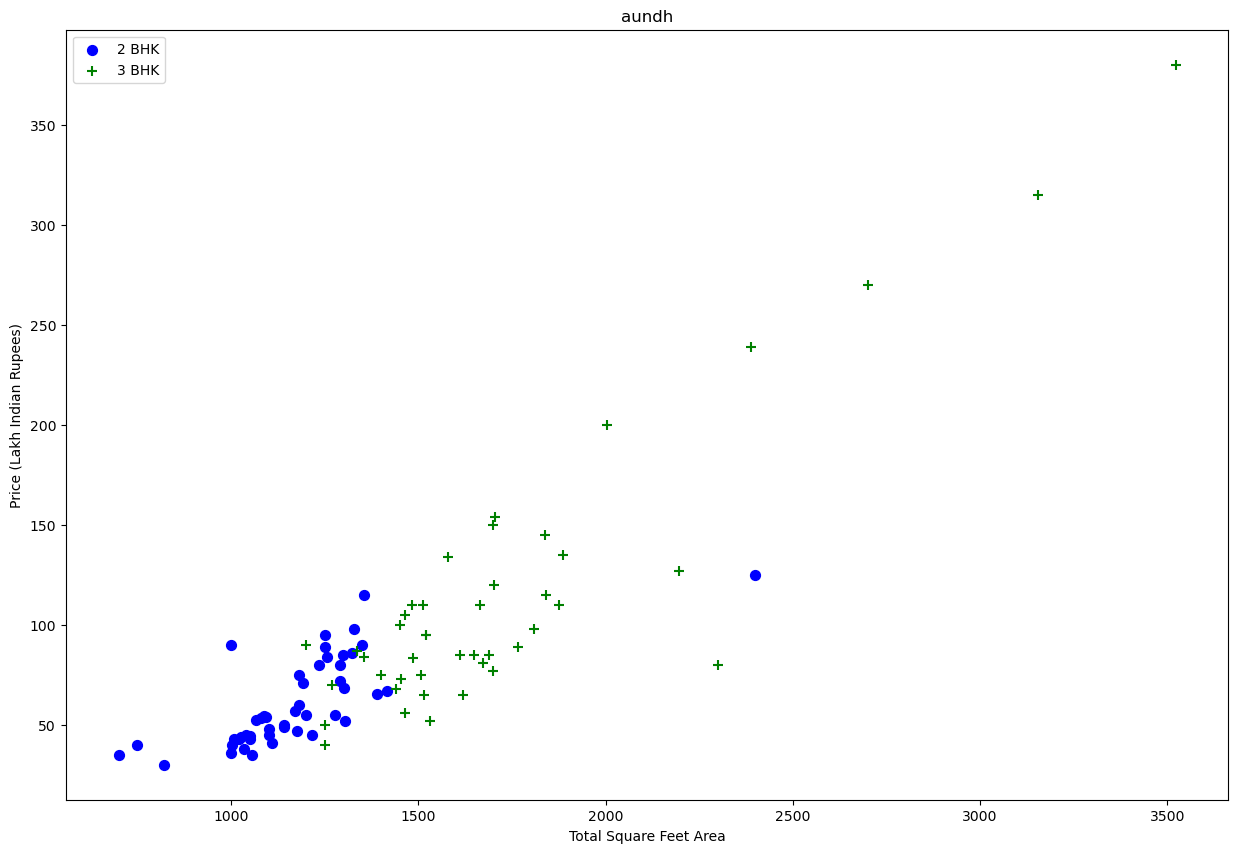

In [32]:
plot_scatter_chart(df6,"aundh")

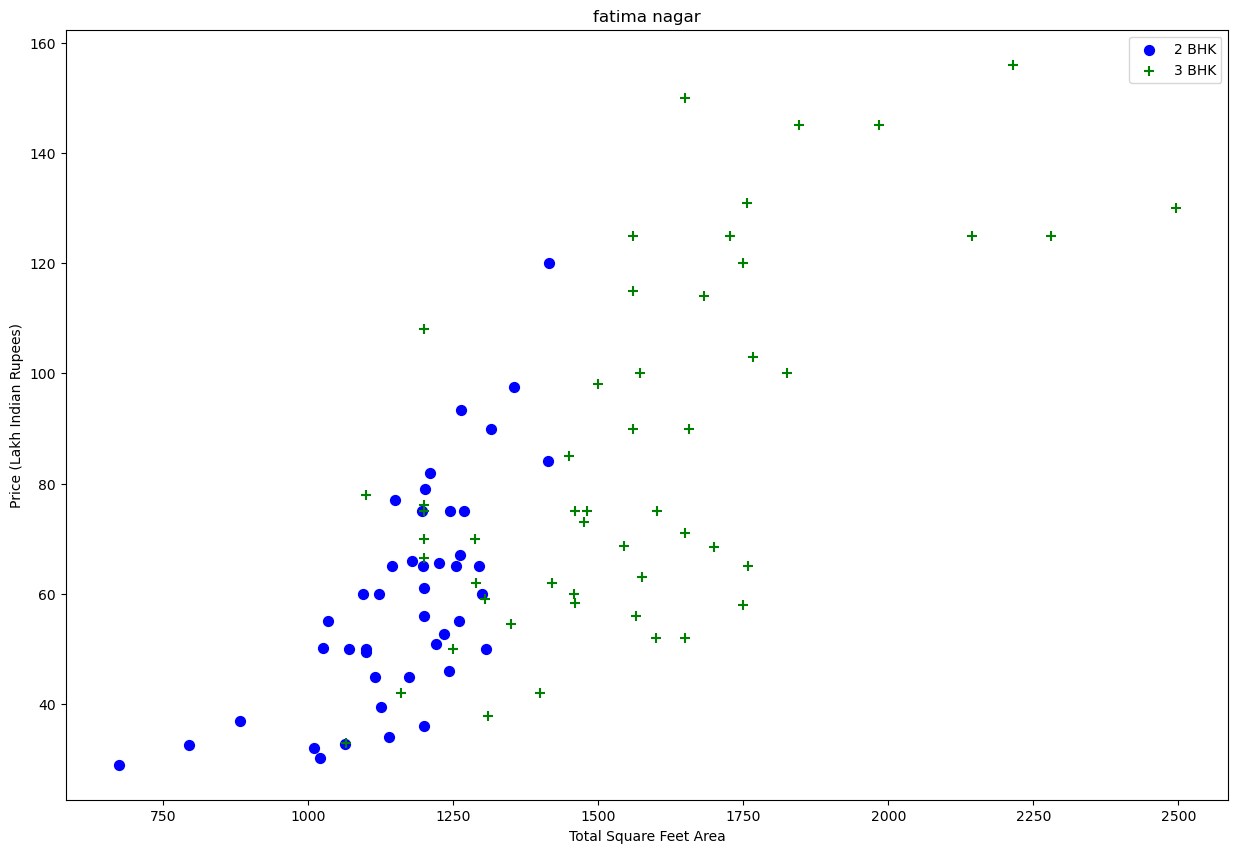

In [33]:
plot_scatter_chart(df6,"fatima nagar")

#### Visualization Summary

From above 2 graphs we can see that prices for some lower bhk (2) are higher than for more bhk (3) properties for almost same sqaure feet area for same location, which should not happen, we will remove such outliers also to have more robust data (~ 1200 total_sqft for fatima nagar and aundh)

We can remove these outliers. For this we will create dictionary of mean and standard deviation per bhk. We can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment and so on

In [34]:
def bhk_outliers(df):
    remove = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                remove = np.append(remove, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(remove,axis='index')

df7 = bhk_outliers(df6)

df7.shape

(7506, 7)

#### Step 4.4.2
'size' and 'price_per_sqft' features are not required now and we can drop them

In [35]:
df7 = df7.drop(['price_per_sqft', 'size'], axis = 'columns')

df7.shape

(7506, 5)

#### Step 4.4.3
Let's check correlation between our features.

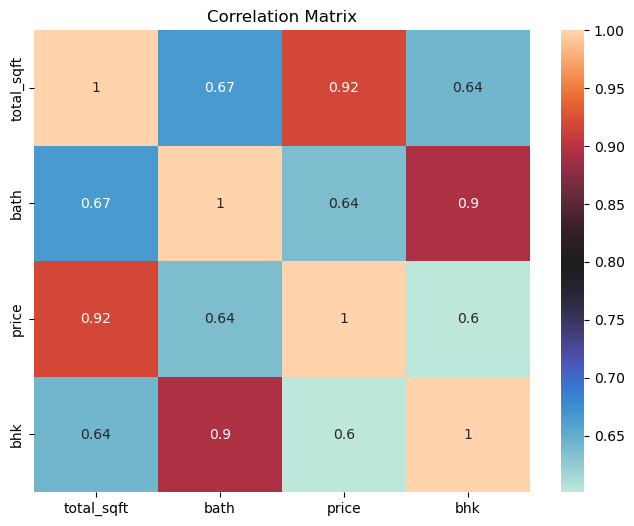

In [36]:
corr_matrix = df7.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title("Correlation Matrix")
plt.show()

From above graph we can see that

1. bath and bhk have the strongest correlation (0.9)

2. bhk and price have weakest relationship (0.60)

In [37]:
df7.shape

(7506, 5)

### Step 4.5 Handling 'bath' feature

Having more than 10 bathroom is not common, we can remove these outliers also

Text(0, 0.5, 'Count')

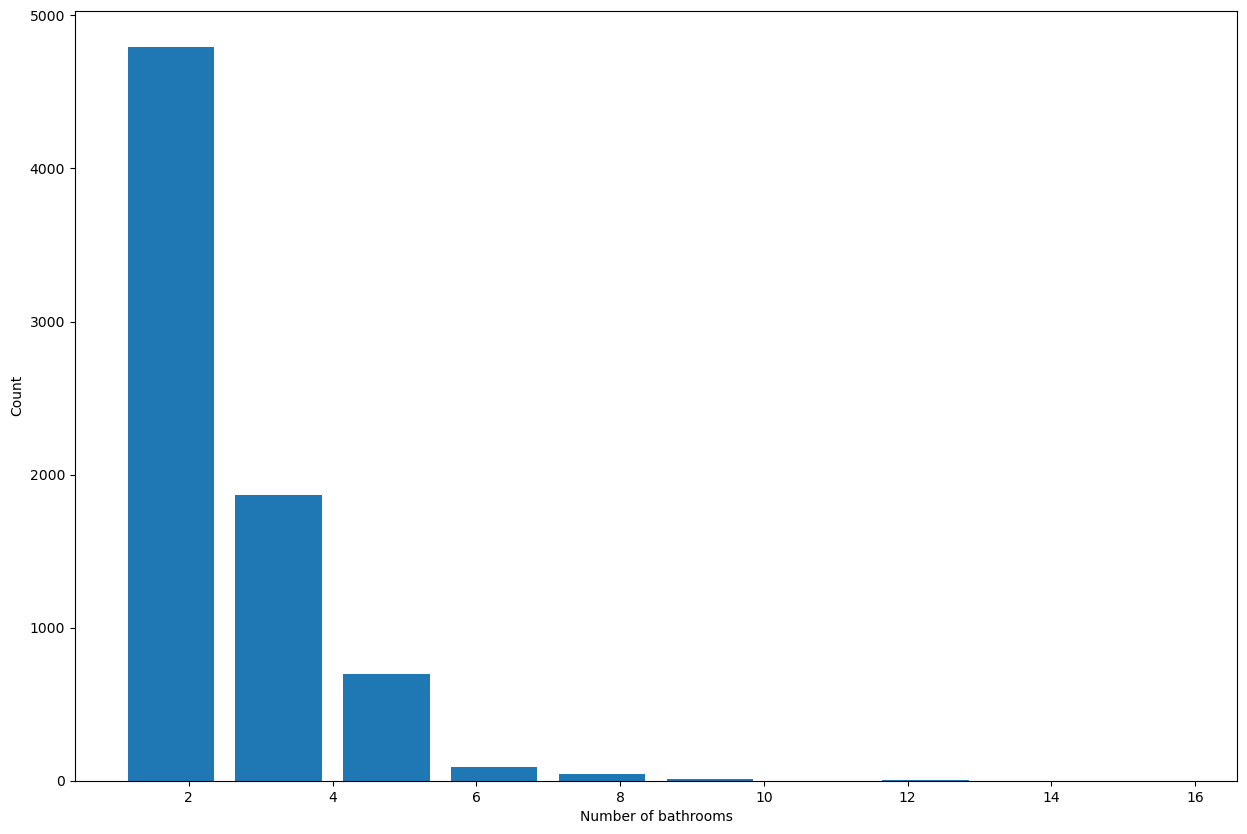

In [38]:
plt.hist(df7.bath,rwidth=0.8)

plt.xlabel("Number of bathrooms")

plt.ylabel("Count")

#### Step 4.5.1

We can see that number of proeprties with more than 10 bathroom are very few

In [39]:
df7[df7.bath>8]

,total_sqft,bath,price,location,bhk
30,4500.0,9.0,166.0,alandi road,9
1214,6000.0,12.0,150.0,bibvewadi,11
2634,12000.0,12.0,525.0,fatima nagar,10
3064,11338.0,9.0,1000.0,ghorpade peth,6
3341,3600.0,9.0,125.0,gokhale nagar,8
4609,6200.0,9.0,200.0,khadaki,9
5254,5425.0,13.0,275.0,kondhwa khurd,13
6345,10000.0,16.0,550.0,model colony,16
6549,5000.0,9.0,210.0,mundhawa,9
6625,4600.0,9.0,200.0,mundhawa,9


#### Step 4.5.2

From our domain knowledge we now that number of bathroom in a property is normally is same as bumber of bedroom
considering this we can remove the proerpties which have 2 bathrooms more than the bedroom

In [40]:
df8 = df7[df7.bath < df7.bhk+2]

df8.head(5)

,total_sqft,bath,price,location,bhk
0,1056.0,2.0,39.07,alandi road,2
1,2894.0,4.0,245.00,alandi road,4
2,1084.0,2.0,50.00,alandi road,2
3,1000.0,2.0,25.00,alandi road,2
4,1230.0,2.0,80.00,alandi road,2


In [41]:
df8.shape

(7442, 5)

In [42]:
df8.head()

,total_sqft,bath,price,location,bhk
0,1056.0,2.0,39.07,alandi road,2
1,2894.0,4.0,245.00,alandi road,4
2,1084.0,2.0,50.00,alandi road,2
3,1000.0,2.0,25.00,alandi road,2
4,1230.0,2.0,80.00,alandi road,2


In [43]:
df8['location'].unique()

array(['alandi road', 'ambegaon budruk', 'anandnagar', 'aundh',
       'aundh road', 'balaji nagar', 'baner', 'baner road',
       'bhandarkar road', 'bhavani peth', 'bibvewadi', 'bopodi',
       'budhwar peth', 'bund garden road', 'camp', 'chandan nagar',
       'dapodi', 'deccan gymkhana', 'dehu road', 'dhankawadi',
       'dhayari phata', 'dhole patil road', 'erandwane', 'fatima nagar',
       'fergusson college road', 'ganesh peth', 'ganeshkhind',
       'ghorpade peth', 'ghorpadi', 'gokhale nagar', 'gultekdi',
       'guruwar peth', 'hadapsar', 'hadapsar industrial estate',
       'hingne khurd', 'jangali maharaj road', 'kalyani nagar',
       'karve nagar', 'karve road', 'kasba peth', 'katraj', 'khadaki',
       'khadki', 'kharadi', 'kondhwa', 'kondhwa budruk', 'kondhwa khurd',
       'koregaon park', 'kothrud', 'law college road', 'laxmi road',
       'lulla nagar', 'mahatma gandhi road', 'mangalwar peth',
       'manik bagh', 'market yard', 'model colony', 'mukund nagar',
     

### Step 4.6 One Hot Encoding

All our features are numerical feature except site_location, we will use One Hot Encoding to encode the feature

In [44]:
encoded_location = pd.get_dummies(df8['location'], drop_first=False)

#### Step 4.6.1

We will now Concat these dummies with our dataset and we will drop site_location feature

In [45]:
df9 = pd.concat([df8, encoded_location], axis='columns')

df10 = df9.drop(['location'], axis = 'columns')

df10.shape

(7442, 100)

In [46]:
df10.head()

,total_sqft,bath,price,bhk,alandi road,ambegaon budruk,anandnagar,aundh,aundh road,balaji nagar,...,uruli devachi,vadgaon budruk,viman nagar,vishrant wadi,wadgaon sheri,wagholi,wakadewadi,wanowrie,warje,yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000.0,2.0,25.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### End of Preprocessing and Feature Engineering process

This is our final dataset which we will be using for Model Building

### Step 5: Model Selection and Training

We will start model building process by splitting our dataset into X and y, where X will represent independent feature and y will be the feature which we want to predict ('price').

In [47]:
X = df10.drop('price', axis = 'columns')

In [48]:
y = df10.price

I have tested different models, along with K-fold cross validation and Grid CV search and I have received best results with Linear Regression model and I will be using only this model for model building.

1. Splitting the data into training and test dataset

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

2. initiating the Linear Regression model

In [50]:
lr_model = LinearRegression()

3. Training the linear regression model on Train dataset

In [51]:
lr_model.fit(X_train,y_train)

LinearRegression()

4. Evaluating the model performance on Test dataset

In [52]:
lr_model.score(X_test,y_test)

0.869203080205301

In [53]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_model.predict(x_df)[0]

In [54]:
predict_price('bhavani peth',1000, 2, 2)

71.73315528018114

In [55]:
predict_price('bhavani peth',1000, 2, 3)

70.21882949131592

In [56]:
predict_price('bhavani peth',1000, 3, 2)

75.28254709339359

In [57]:
predict_price('bhavani peth',1000, 3, 3)

73.76822130452837

### Step 6: Ingesting Trained Model into Pipeline and saving the results

In [58]:
data_columns = list(X_train.columns)  

with open('columns.json', 'w') as f:
    json.dump({'data_columns': data_columns}, f)

In [59]:
import pickle
with open('pune_house_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [60]:
def load_saved_columns(json_path='columns.json'):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data['data_columns']

def load_model(model_path='lr_model.pickle'):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

def predict_price(model,location,sqft,bath,bhk,data_columns):    
    loc_index = -1
    if location in data_columns:
        loc_index = data_columns.index(location)

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_model.predict(x_df)[0]

def store_predictions(predictions, ennovate_db='data_pipeline.db'):
    with sqlite3.connect(ennovate_db) as conn:
        conn.execute('''
            CREATE TABLE IF NOT EXISTS predictions (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                location TEXT,
                total_sqft REAL,
                bath INTEGER,
                bhk INTEGER,
                predicted_price REAL
            )
        ''')
        print("\nPredictions table schema is set up.\n")
        
        for pred in predictions:
            location, sqft, bath, bhk, predicted_price = pred
            conn.execute('''
                INSERT INTO predictions (location, total_sqft, bath, bhk, predicted_price)
                VALUES (?, ?, ?, ?, ?)
            ''', (location, sqft, bath, bhk, predicted_price))
        print(f"\nPredictions stored successfully.\n")
        
def run_model_pipeline(model_path, data_db='data_pipeline.db'):
    global df8
    
    # Load model
    model = load_model(model_path)
    
    # Load the feature names used during training
    data_columns = load_saved_columns('columns.json')
    
    if df8 is not None:
        df = df8
        print("\nUsing preprocessed df8 DataFrame.\n")
    else:
        engine = create_engine(f'sqlite:///{data_db}')
        df = pd.read_sql('data', con=engine)
    
    # Make predictions
    predictions = []
    for _, row in df.iterrows():
        try:
            location = row['location']
            sqft = row['total_sqft']
            bath = row['bath']
            bhk = row['bhk']
        except KeyError as e:
            print(f"KeyError: {e}")
            continue  # Skip rows with missing columns
        
        predicted_price = predict_price(model, location, sqft, bath, bhk, data_columns)
        predictions.append((location, sqft, bath, bhk, predicted_price))
    
    # Store predictions
    store_predictions(predictions)

    print("Model Integration Pipeline is completed.")

In [61]:
if __name__ == "__main__":
    model_path = r"C:\Users\lenovo\Desktop\Project\Ennovate_Test\pune_house_price_model.pickle"
    run_model_pipeline(model_path)


Using preprocessed df8 DataFrame.


Predictions table schema is set up.


Predictions stored successfully.

Model Integration Pipeline is completed.
